In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
moviesDF = pd.read_csv("rotten_tomatoes_movies.csv")

moviesDF.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [3]:
def printAmtNa(aDF):
    for aCol in moviesDF:
        print(f"The amount of missing values in {aCol} is {moviesDF[aCol].isna().sum()}")

printAmtNa(moviesDF)

The amount of missing values in id is 0
The amount of missing values in title is 367
The amount of missing values in audienceScore is 70010
The amount of missing values in tomatoMeter is 109381
The amount of missing values in rating is 129267
The amount of missing values in ratingContents is 129267
The amount of missing values in releaseDateTheaters is 112485
The amount of missing values in releaseDateStreaming is 63838
The amount of missing values in runtimeMinutes is 13827
The amount of missing values in genre is 11083
The amount of missing values in originalLanguage is 13858
The amount of missing values in director is 4217
The amount of missing values in writer is 53142
The amount of missing values in boxOffice is 128515
The amount of missing values in distributor is 120257
The amount of missing values in soundMix is 127341


In [4]:
print(moviesDF.shape)

(143258, 16)


In [5]:
moviesDF = moviesDF.drop(columns=["ratingContents", "distributor", "soundMix"])

In [6]:
experienceGroup = moviesDF.groupby("audienceScore")

experienceGroup.size()

audienceScore
0.0      1143
1.0         2
2.0        13
3.0        34
4.0        50
         ... 
96.0      209
97.0      165
98.0       91
99.0       85
100.0    1619
Length: 101, dtype: int64

In [7]:
tomatoesScore = moviesDF.groupby("tomatoMeter")

tomatoesScore.size()

tomatoMeter
0.0       706
1.0         4
2.0        13
3.0        25
4.0        52
         ... 
96.0      418
97.0      306
98.0      226
99.0       80
100.0    3762
Length: 101, dtype: int64

A "good" rotten tomates score is 60, so I put 70 to make it a little better

In [8]:
tomatoScore = 70
moviesDF = moviesDF[moviesDF['tomatoMeter'] >= tomatoScore]

A "good" movie score is about a 70, but I put 80 to make it a little better

In [9]:
minimumScore = 80
moviesDF = moviesDF[moviesDF['audienceScore'] >= minimumScore]

In [10]:
print(moviesDF.shape)

(6267, 13)


In [11]:
minRunTime = 90
maxRunTime = 120
moviesDF = moviesDF[moviesDF['runtimeMinutes'] >= minRunTime]
moviesDF = moviesDF[moviesDF['runtimeMinutes'] <= maxRunTime]

In [12]:
def printAmtNa(aDF):
    for aCol in moviesDF:
        print(f"The amount of missing values in {aCol} is {moviesDF[aCol].isna().sum()}")

printAmtNa(moviesDF)

The amount of missing values in id is 0
The amount of missing values in title is 0
The amount of missing values in audienceScore is 0
The amount of missing values in tomatoMeter is 0
The amount of missing values in rating is 2735
The amount of missing values in releaseDateTheaters is 1147
The amount of missing values in releaseDateStreaming is 401
The amount of missing values in runtimeMinutes is 0
The amount of missing values in genre is 1
The amount of missing values in originalLanguage is 28
The amount of missing values in director is 4
The amount of missing values in writer is 802
The amount of missing values in boxOffice is 2024


In [13]:
moviesDF["rating"].value_counts()

rating
R        406
PG-13    249
PG       160
TVPG       5
TVMA       4
TV14       1
NC-17      1
Name: count, dtype: int64

In [14]:
ratingDF = moviesDF.dropna(axis=0)

ratingDF.head()

,id,title,audienceScore,tomatoMeter,rating,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice
88,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,2002-02-22,2002-09-24,100.0,"Comedy, Drama",English,Mira Nair,Sabrina Dhawan,$13.9M
304,damned_united,The Damned United,85.0,92.0,R,2009-10-09,2009-10-20,97.0,"Drama, Biography",English,Tom Hooper,Peter Morgan,$449.6K
499,juno,Juno,88.0,94.0,PG-13,2007-12-25,2008-04-15,96.0,"Comedy, Drama",English,Jason Reitman,Diablo Cody,$143.5M
771,sixth_sense,The Sixth Sense,90.0,86.0,PG-13,1999-08-06,2003-09-02,107.0,Mystery & thriller,English,M. Night Shyamalan,M. Night Shyamalan,$293.5M
777,eighth_grade,Eighth Grade,82.0,99.0,R,2018-08-03,2018-10-09,93.0,"Comedy, Drama",English,Bo Burnham,Bo Burnham,$13.5M


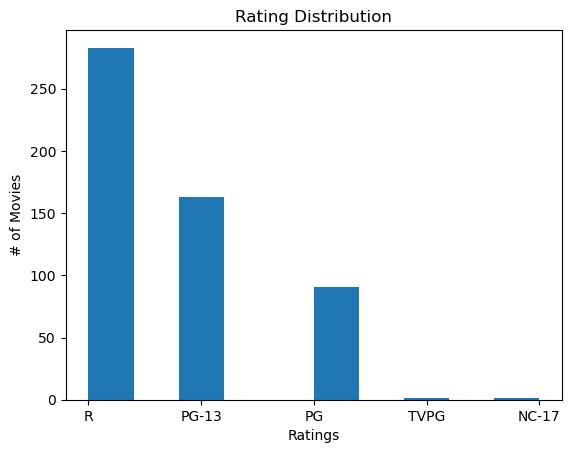

In [15]:
plt.hist(ratingDF["rating"])

plt.title("Rating Distribution")
plt.xlabel("Ratings")
plt.ylabel("# of Movies")
# put all visual stuff before our show command

plt.show()

Text(0, 0.5, 'Title of Film')

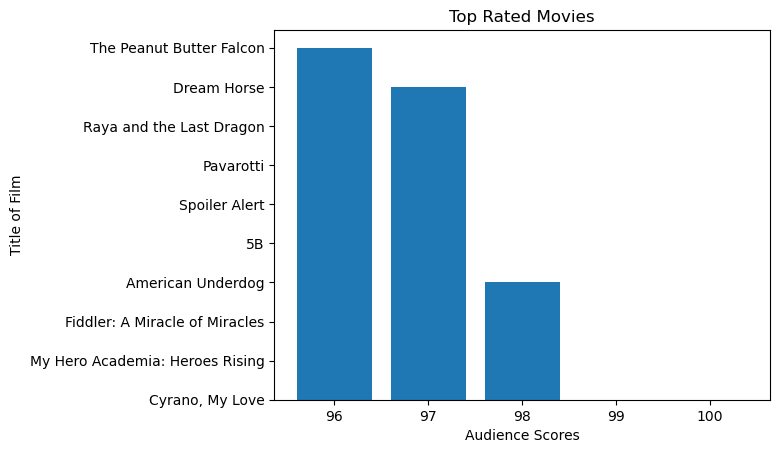

In [16]:
top_audience = ratingDF.sort_values('audienceScore', ascending=False).head(10)

plt.bar(top_audience["audienceScore"], top_audience["title"])

plt.title("Top Rated Movies")
plt.xlabel("Audience Scores")
plt.ylabel("Title of Film")

Text(0, 0.5, 'Title of Film')

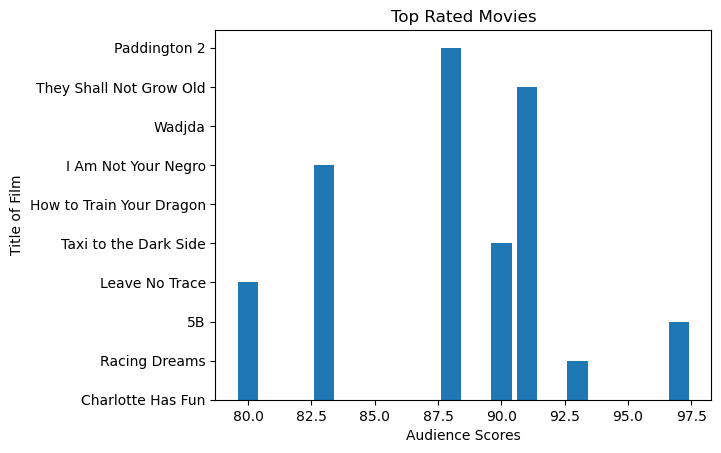

In [17]:
top_critic = ratingDF.sort_values('tomatoMeter', ascending=False).head(10)

plt.bar(top_critic["audienceScore"], top_critic["title"])

plt.title("Top Rated Movies")
plt.xlabel("Audience Scores")
plt.ylabel("Title of Film")

Text(0, 0.5, 'Critic Scores')

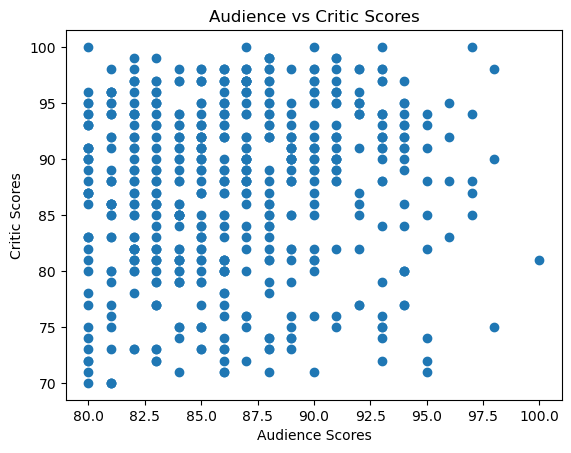

In [18]:
plt.scatter(ratingDF["audienceScore"], ratingDF["tomatoMeter"])

plt.title("Audience vs Critic Scores")
plt.xlabel("Audience Scores")
plt.ylabel("Critic Scores")

In [19]:
top_movie = top_audience[["title", "audienceScore", "tomatoMeter"]]

top_movie.head()

,title,audienceScore,tomatoMeter
61403,"Cyrano, My Love",100.0,81.0
65127,My Hero Academia: Heroes Rising,98.0,90.0
127343,Fiddler: A Miracle of Miracles,98.0,98.0
43335,American Underdog,98.0,75.0
79828,5B,97.0,100.0
